<a href="https://colab.research.google.com/github/01aleem/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Capstone 2- Regression/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')


In [5]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Sep-10,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


In [ ]:
df.corrwith(df.Close)

Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
dtype: float64

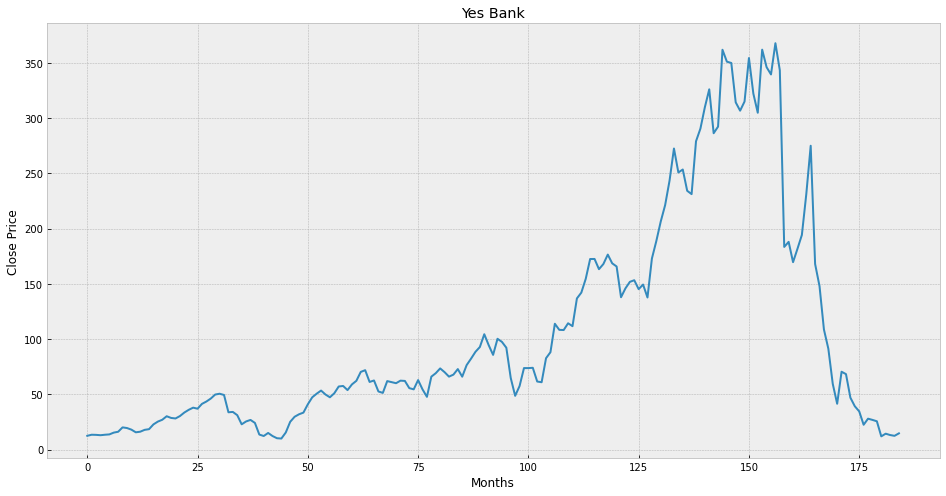

In [6]:
# Visualize the close price

plt.figure(figsize = (16, 8))
plt.title('Yes Bank')
plt.xlabel('Months')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [7]:
# Get close price

df = df[['Close']]
df.head()

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41


In [9]:
# create a variable to predict 'x' months out into the future

future_months = 25

# create a new column (target) shifted 'x' units/months up

df['Prediction'] = df[['Close']].shift(-future_months)
df.head(30)

,Close,Prediction
0,12.46,36.99
1,13.42,41.36
2,13.30,43.48
3,12.99,46.18
4,13.41,49.81
5,13.71,50.54
6,15.33,49.42
7,16.12,33.75
8,20.08,34.06
9,19.49,31.13


In [10]:
df.tail(30)

,Close,Prediction
155,339.60,11.95
156,367.90,14.37
157,343.40,13.15
158,183.45,12.42
159,188.05,14.67
160,169.65,NaN
161,181.75,NaN
162,194.30,NaN
163,231.20,NaN
164,275.05,NaN


In [ ]:
# Create the feature dataset (X) and convert it to numpy array and remove the last 'x' months/units

X = np.array(df.drop(['Prediction'], 1))[:-future_months]
print(X)

In [12]:
# Create target data set (y) and convert into numpy array and get all of target values except the last x units

y = np.array(df['Prediction'])[:-future_months]
print(y)

[ 36.99  41.36  43.48  46.18  49.81  50.54  49.42  33.75  34.06  31.13
  22.85  25.45  26.83  24.13  13.58  12.26  15.03  12.24  10.26   9.98
  15.45  25.12  29.68  31.93  33.45  40.99  47.31  50.57  53.41  49.84
  47.32  50.97  57.1   57.57  53.83  58.99  62.22  70.3   71.86  61.21
  62.54  52.59  51.29  61.98  61.02  60.07  62.38  62.13  55.61  54.5
  62.9   54.49  47.72  65.99  69.14  73.46  70.07  66.02  67.83  72.85
  65.97  76.44  82.29  88.48  92.84 104.41  94.5   85.71 100.28  97.49
  92.2   64.76  48.65  57.5   73.76  73.74  74.02  61.59  60.95  82.7
  88.14 113.89 108.38 108.21 114.33 111.7  136.83 142.08 154.57 172.5
 172.55 163.31 167.96 176.52 168.6  165.74 137.9  145.92 151.82 153.3
 145.23 149.38 137.67 172.91 188.73 206.39 221.3  243.44 272.56 250.85
 253.52 234.28 231.26 279.1  290.56 309.82 326.14 286.38 292.37 361.96
 351.15 350.   314.35 306.8  315.05 354.45 322.25 304.9  362.05 346.2
 339.6  367.9  343.4  183.45 188.05 169.65 181.75 194.3  231.2  275.05
 168.   147

In [13]:
# split the data into 75% training and 25% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [14]:
# create the models

#decsion tree regressor
tree = DecisionTreeRegressor().fit(X_train, y_train)

# linear reg model
lr = LinearRegression().fit(X_train, y_train)

In [16]:
# get last x rows of the feature dataset

x_future = df.drop(['Prediction'], 1)[:-future_months]
x_future = x_future.tail(future_months)
x_future = np.array(x_future)
x_future

array([[253.52],
       [234.28],
       [231.26],
       [279.1 ],
       [290.56],
       [309.82],
       [326.14],
       [286.38],
       [292.37],
       [361.96],
       [351.15],
       [350.  ],
       [314.35],
       [306.8 ],
       [315.05],
       [354.45],
       [322.25],
       [304.9 ],
       [362.05],
       [346.2 ],
       [339.6 ],
       [367.9 ],
       [343.4 ],
       [183.45],
       [188.05]])

In [19]:
# show model tree prediciton

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[169.65 181.75 194.3  108.7  275.05 168.   147.95 108.7   91.3   26.85
  70.45  70.45  68.3   46.95  39.2   34.55 147.95  27.95  26.85  13.15
  11.95  14.37  13.15  12.42  14.67]

[160.39916642 154.91763602 154.05722949 167.68698074 170.95196715
 176.4391956  181.08880974 169.76107333 171.46764126 191.29402902
 188.21422945 187.8865912  177.72980541 175.57878906 177.92923739
 189.15440878 179.98053774 175.03747369 191.31967027 186.80396046
 184.9236018  192.98635181 186.00623254 140.43602531 141.74657832]


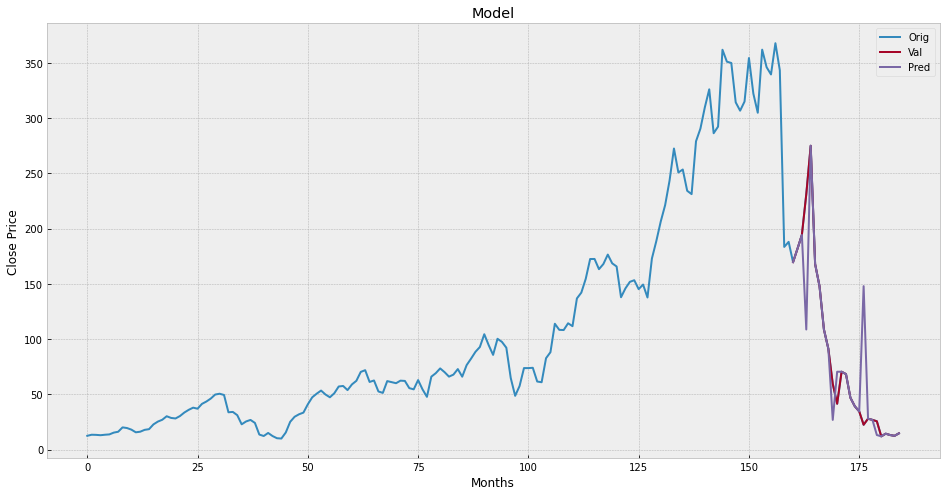

In [22]:
# visualize the data

predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Months')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

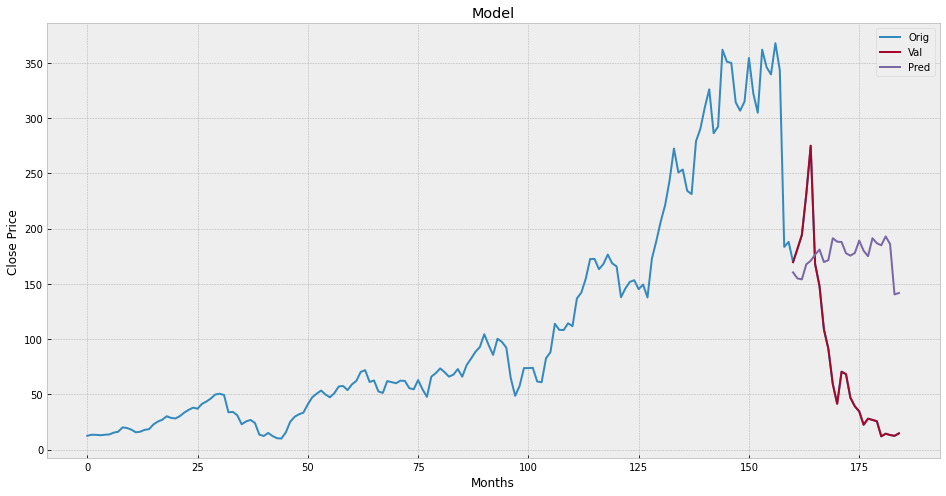

In [23]:
# visualize the data

predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Months')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

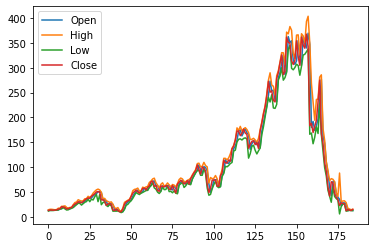

In [ ]:
df.plot.line()

In [ ]:
X = df[['High','Low','Open']]
y = df[['Close']]

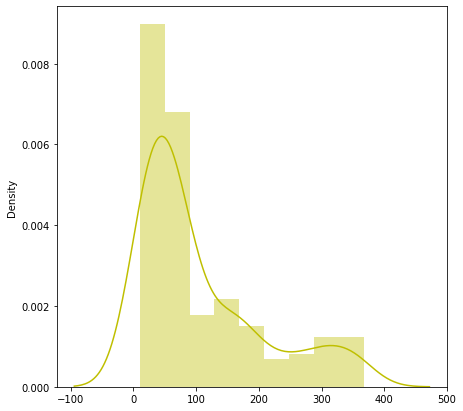

In [ ]:
# checking the distribution of the dependent variable

plt.figure(figsize=(7,7))
sns.distplot(y,color="y")

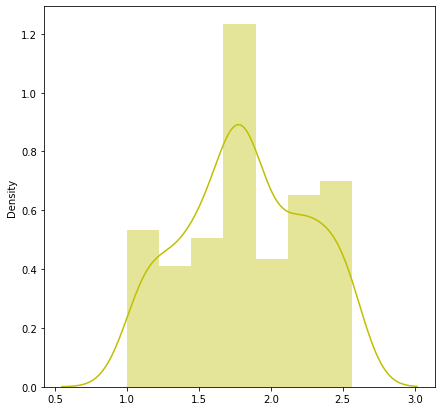

In [ ]:
# applying log transformation

plt.figure(figsize=(7,7))
sns.distplot(np.log10(y),color="y")

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=25)

In [ ]:
X_train.shape

(138, 3)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([[ 48.30808793],
       [108.30520334],
       [ 30.81676789],
       [345.99658617],
       [299.54004613],
       [249.46950533],
       [353.65169696],
       [318.29689626],
       [140.78982589],
       [ 35.65002676],
       [ 69.84614155],
       [ 45.95883433],
       [ 62.36628198],
       [ 58.02324731],
       [ 54.38624985],
       [ 11.71702596],
       [ 60.32121001],
       [ 74.13589786],
       [ 39.95305923],
       [ 62.50899171],
       [ 48.85079151],
       [ 74.09531853],
       [ 14.44095362],
       [ 90.5233311 ],
       [341.53306757],
       [ 47.33189128],
       [ 17.01190007],
       [322.31387853],
       [ 40.08265174],
       [ 14.70823888],
       [167.26502505],
       [118.27006599],
       [134.8904143 ],
       [ 17.92650184],
       [ 65.25909043],
       [ 14.82677276],
       [ 54.31227191],
       [ 33.68710415],
       [ 36.93395824],
       [ 56.47979654],
       [ 18.67263356],
       [ 69.95468214],
       [ 51.38461136],
       [ 20

In [ ]:
model.intercept_ # y intercept(c)

array([7.70518672])

In [ ]:
model.coef_ # coefficient

array([[ 189.40044235,  345.21331565, -166.51702307]])

In [ ]:
r2_score(y_test,y_predict) # Without MinMax Scaler: 0.9967865783745083

0.9967865783745083

In [ ]:
mean_absolute_error(y_test,y_predict)

3.7812700694460943

In [ ]:
mean_squared_error(y_test,y_predict)

35.62538681522711